In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv("/content/drive/MyDrive/ATM_Forecating_system/district_month_MODEL_READY_LAGS.csv")

TARGET = "district_atm_withdrawal_volume_mn"
FEATURES = [c for c in df.columns if c != TARGET]


model = joblib.load("/content/drive/MyDrive/ATM_Forecating_system/models/xgboost.pkl")


df = df.sort_values(["year", "month_num"]).reset_index(drop=True)


In [5]:
backtest_results = []

years = sorted(df["year"].unique())

START_TEST_YEAR = 2019

for test_year in years:
    if test_year < START_TEST_YEAR:
        continue

    train_data = df[df["year"] < test_year]
    test_data  = df[df["year"] == test_year]

    if len(test_data) == 0 or len(train_data) == 0:
        continue

    X_train = train_data[FEATURES]
    y_train = train_data[TARGET]

    X_test = test_data[FEATURES]
    y_test = test_data[TARGET]


    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    backtest_results.append({
        "test_year": test_year,
        "train_rows": len(train_data),
        "test_rows": len(test_data),
        "MAE": mae,
        "RMSE": rmse
    })


In [6]:
backtest_df = pd.DataFrame(backtest_results)

print(backtest_df)
print("\nAverage MAE:", backtest_df["MAE"].mean())
print("Average RMSE:", backtest_df["RMSE"].mean())


   test_year  train_rows  test_rows       MAE      RMSE
0       2019       17904       8952  0.006873  0.008621
1       2020       26856       8952  0.018802  0.024984
2       2021       35808       8952  0.017523  0.029742
3       2022       44760       8952  0.006284  0.008402
4       2023       53712       8952  0.006912  0.009391
5       2024       62664       8952  0.008320  0.011119
6       2025       71616       7460  0.004497  0.006013

Average MAE: 0.009887295498592772
Average RMSE: 0.01403895439697209


In [8]:
backtest_df.to_csv(
    "/content/drive/MyDrive/ATM_Forecasting_system/ATM_Forecasting_backtest_results.csv",
    index=False
)


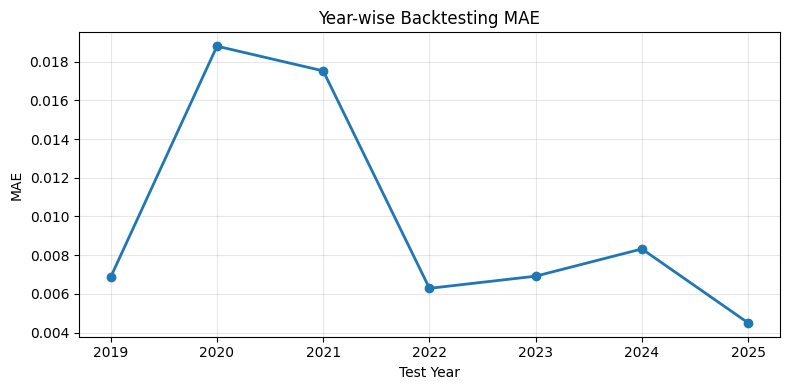

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(
    backtest_df["test_year"],
    backtest_df["MAE"],
    marker="o",
    linewidth=2
)
plt.title("Year-wise Backtesting MAE")
plt.xlabel("Test Year")
plt.ylabel("MAE")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


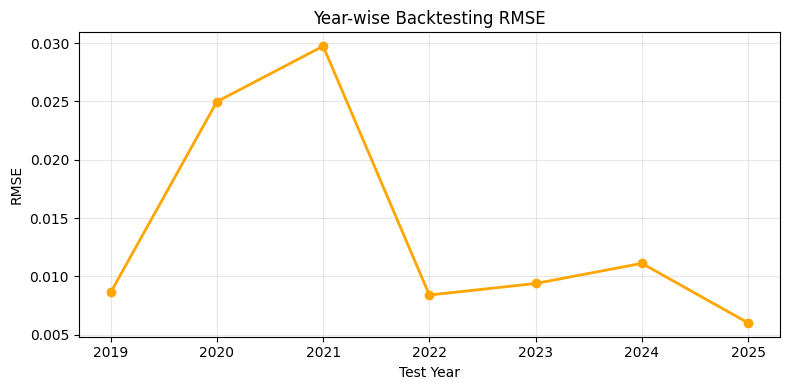

In [10]:
plt.figure(figsize=(8,4))
plt.plot(
    backtest_df["test_year"],
    backtest_df["RMSE"],
    marker="o",
    linewidth=2,
    color="orange"
)
plt.title("Year-wise Backtesting RMSE")
plt.xlabel("Test Year")
plt.ylabel("RMSE")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
backtest_df.round(4)

,test_year,train_rows,test_rows,MAE,RMSE
0,2019,17904,8952,0.0069,0.0086
1,2020,26856,8952,0.0188,0.0250
2,2021,35808,8952,0.0175,0.0297
3,2022,44760,8952,0.0063,0.0084
4,2023,53712,8952,0.0069,0.0094
5,2024,62664,8952,0.0083,0.0111
6,2025,71616,7460,0.0045,0.0060
